<a href="https://colab.research.google.com/github/manishaachary13/Space-Launch-Mission/blob/main/mission%20launch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈️ Project Title:  **Big Data Analytics of Global Space Launch Missions**

# **🧩 Problem Statement:**

With the rise of both government and private space agencies, the number of satellite and exploratory missions has increased rapidly. However, delays, failures, and cost overruns still pose a serious challenge. This project aims to use Big Data tools (specifically PySpark) to analyze historical space launch data, uncover patterns in successful/failed missions, and predict mission outcomes.

This project aims to utilize **Big Data analytics using PySpark** to process and analyze historical global space launch mission data. The goals are to:
* Identify patterns and trends in space launch activity over time.
* Analyze mission success/failure based on organization, rocket status, launch site, or launch type.
* Explore cost drivers in space missions and the relationship between cost and success.
* Predict mission outcomes (success/failure) using classification models.

## 🛰️ Key Features in the Dataset:


Organisation: Agency or private company (e.g., SpaceX, ISRO, NASA, Roscosmos)

Location: Launch site

Date: Mission launch date

Detail: Description of the mission

Rocket_Status: Operational status of the rocket

Price: Launch cost (in million USD)

Mission_Status: Outcome of the mission (e.g., Success, Failure, Partial Failure)

#### 📦 1. Install and Configure PySpark

In [1]:
# 1. Install Java and PySpark
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install -q pyspark findspark

# 2. Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

# 3. Initialize Findspark
import findspark
findspark.init()

# 4. Start Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SpaceLaunchBigData") \
    .getOrCreate()

print("✅ Spark Session Created Successfully")



✅ Spark Session Created Successfully


#### Load CSV (from Github)

In [3]:
!wget -O mission_launches.csv "https://raw.githubusercontent.com/manishaachary13/Space-Launch-Mission/refs/heads/main/mission_launches.csv"


--2025-04-13 12:40:07--  https://raw.githubusercontent.com/manishaachary13/Space-Launch-Mission/refs/heads/main/mission_launches.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632009 (617K) [text/plain]
Saving to: ‘mission_launches.csv’

mission_launches.cs 100%[===================>] 617.20K  --.-KB/s    in 0.04s   

2025-04-13 12:40:08 (14.9 MB/s) - ‘mission_launches.csv’ saved [632009/632009]



In [5]:
df = spark.read.csv("mission_launches.csv", header=True, inferSchema=True)



#### Basic Informations

In [6]:
df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- Organisation: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Detail: string (nullable = true)
 |-- Rocket_Status: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Mission_Status: string (nullable = true)



In [7]:
df.show(5, truncate=False)


+---+----------+------------+---------------------------------------------------------+--------------------------+--------------------------------------------+-------------+-----+--------------+
|_c0|Unnamed: 0|Organisation|Location                                                 |Date                      |Detail                                      |Rocket_Status|Price|Mission_Status|
+---+----------+------------+---------------------------------------------------------+--------------------------+--------------------------------------------+-------------+-----+--------------+
|0  |0         |SpaceX      |LC-39A, Kennedy Space Center, Florida, USA               |Fri Aug 07, 2020 05:12 UTC|Falcon 9 Block 5 | Starlink V1 L9 & BlackSky|StatusActive |50.0 |Success       |
|1  |1         |CASC        |Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China|Thu Aug 06, 2020 04:01 UTC|Long March 2D | Gaofen-9 04 & Q-SAT         |StatusActive |29.75|Success       |
|2  |2         |SpaceX   

In [8]:
print("Number of Rows:", df.count())
print("Number of Columns:", len(df.columns))


Number of Rows: 4324
Number of Columns: 9


#### Describe numerical columns

In [9]:
df.describe().show()


+-------+------------------+------------------+------------+--------------------+--------------------+--------------------+-------------+------------------+--------------+
|summary|               _c0|        Unnamed: 0|Organisation|            Location|                Date|              Detail|Rocket_Status|             Price|Mission_Status|
+-------+------------------+------------------+------------+--------------------+--------------------+--------------------+-------------+------------------+--------------+
|  count|              4324|              4324|        4324|                4324|                4324|                4324|         4324|               964|          4324|
|   mean|            2161.5|            2161.5|        NULL|                NULL|                NULL|                NULL|         NULL|129.79523709167552|          NULL|
| stddev|1248.3756112110916|1248.3756112110916|        NULL|                NULL|                NULL|                NULL|         NULL| 14

#### Checking for Missing Values(Column-wise)

In [10]:
from pyspark.sql.functions import col, when, count, isnan

df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()


+---+----------+------------+--------+----+------+-------------+-----+--------------+
|_c0|Unnamed: 0|Organisation|Location|Date|Detail|Rocket_Status|Price|Mission_Status|
+---+----------+------------+--------+----+------+-------------+-----+--------------+
|  0|         0|           0|       0|   0|     0|            0| 3360|             0|
+---+----------+------------+--------+----+------+-------------+-----+--------------+



#### Unique Values per column

In [11]:
for col_name in df.columns:
    df.select(col_name).distinct().count()
    print(f"Unique values in '{col_name}':", df.select(col_name).distinct().count())


Unique values in '_c0': 4324
Unique values in 'Unnamed: 0': 4324
Unique values in 'Organisation': 56
Unique values in 'Location': 137
Unique values in 'Date': 4319
Unique values in 'Detail': 4278
Unique values in 'Rocket_Status': 2
Unique values in 'Price': 57
Unique values in 'Mission_Status': 4


#### Column names and Their Datatypes

In [12]:
[(name, dtype) for name, dtype in df.dtypes]

[('_c0', 'int'),
 ('Unnamed: 0', 'int'),
 ('Organisation', 'string'),
 ('Location', 'string'),
 ('Date', 'string'),
 ('Detail', 'string'),
 ('Rocket_Status', 'string'),
 ('Price', 'string'),
 ('Mission_Status', 'string')]

#### Frequecy of each mission status

In [13]:
df.groupBy("Mission_Status").count().orderBy("count", ascending=False).show()


+-----------------+-----+
|   Mission_Status|count|
+-----------------+-----+
|          Success| 3879|
|          Failure|  339|
|  Partial Failure|  102|
|Prelaunch Failure|    4|
+-----------------+-----+



#### Frequency of each rocket status

In [14]:
df.groupBy("Rocket_Status").count().orderBy("count", ascending=False).show()


+-------------+-----+
|Rocket_Status|count|
+-------------+-----+
|StatusRetired| 3534|
| StatusActive|  790|
+-------------+-----+



#### Check for blank strings

In [15]:
from pyspark.sql.functions import length, trim

df.select([count(when(trim(col(c)) == "", c)).alias(c) for c in df.columns]).show()


+---+----------+------------+--------+----+------+-------------+-----+--------------+
|_c0|Unnamed: 0|Organisation|Location|Date|Detail|Rocket_Status|Price|Mission_Status|
+---+----------+------------+--------+----+------+-------------+-----+--------------+
|  0|         0|           0|       0|   0|     0|            0|    0|             0|
+---+----------+------------+--------+----+------+-------------+-----+--------------+



####  Check for Duplicate rows

In [16]:
duplicates = df.groupBy(df.columns).count().filter("count > 1")
print("Number of duplicate rows:", duplicates.count())


Number of duplicate rows: 0


#### Length of tect columns

In [17]:
from pyspark.sql.functions import length

df.select("Organisation", length(col("Organisation")).alias("Length")).show(5)


+------------+------+
|Organisation|Length|
+------------+------+
|      SpaceX|     6|
|        CASC|     4|
|      SpaceX|     6|
|   Roscosmos|     9|
|         ULA|     3|
+------------+------+
only showing top 5 rows



#### Distribution of data in numerial columns

In [18]:
df.select("Price").describe().show()


+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|               964|
|   mean|129.79523709167552|
| stddev| 143.2203233531596|
|    min|           1,160.0|
|    max|              90.0|
+-------+------------------+



#### Check for mixed data types

In [19]:
df.select("Price").distinct().orderBy("Price").show(20)


+-------+
|  Price|
+-------+
|   NULL|
|1,160.0|
|  109.0|
|  112.5|
|  115.0|
|   12.0|
|  120.0|
|  123.0|
|  130.0|
|  133.0|
|  135.0|
|  136.6|
|  140.0|
|  145.0|
|   15.0|
|  153.0|
|  164.0|
|  190.0|
|   20.0|
|  20.14|
+-------+
only showing top 20 rows



####Sample Date Checks (Earliest & Latest)

In [20]:
df.select("Date").orderBy("Date").show(5)  # Earliest
df.select("Date").orderBy("Date", ascending=False).show(5)  # Latest


+--------------------+
|                Date|
+--------------------+
|Fri Apr 01, 1960 ...|
|Fri Apr 02, 1971 ...|
|Fri Apr 02, 1999 ...|
|Fri Apr 02, 2010 ...|
|Fri Apr 03, 1970 ...|
+--------------------+
only showing top 5 rows

+--------------------+
|                Date|
+--------------------+
|Wed Sep 30, 2015 ...|
|Wed Sep 30, 1981 ...|
|Wed Sep 29, 1976 ...|
|Wed Sep 29, 1971 ...|
|Wed Sep 28, 1983 ...|
+--------------------+
only showing top 5 rows



####Top Launching Organizations

In [21]:
df.groupBy("Organisation").count().orderBy("count", ascending=False).show(10)


+----------------+-----+
|    Organisation|count|
+----------------+-----+
|       RVSN USSR| 1777|
|     Arianespace|  279|
|            CASC|  251|
|General Dynamics|  251|
|            NASA|  203|
|          VKS RF|  201|
|    US Air Force|  161|
|             ULA|  140|
|          Boeing|  136|
| Martin Marietta|  114|
+----------------+-----+
only showing top 10 rows



#### Detecting columns with constant or low variance values

In [22]:
for c in df.columns:
    unique_count = df.select(c).distinct().count()
    if unique_count <= 2:
        print(f"Column '{c}' has low variance: only {unique_count} unique values")


Column 'Rocket_Status' has low variance: only 2 unique values


#### Null Value Matrix for visual inspection

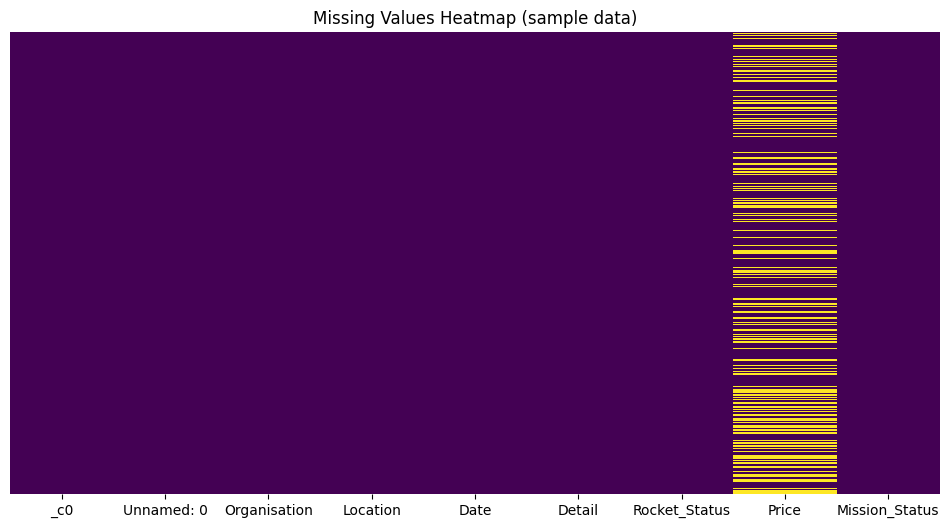

In [23]:
sample_df = df.limit(1000).toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(sample_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap (sample data)")
plt.show()


#### View Potential Typos in 'Organisation

In [25]:
df.select("Organisation").distinct().orderBy("Organisation").show(50, truncate=False)


+----------------+
|Organisation    |
+----------------+
|AEB             |
|AMBA            |
|ASI             |
|Arianespace     |
|Arm??e de l'Air |
|Blue Origin     |
|Boeing          |
|CASC            |
|CASIC           |
|CECLES          |
|CNES            |
|Douglas         |
|EER             |
|ESA             |
|Eurockot        |
|ExPace          |
|Exos            |
|General Dynamics|
|IAI             |
|ILS             |
|IRGC            |
|ISA             |
|ISAS            |
|ISRO            |
|JAXA            |
|KARI            |
|KCST            |
|Khrunichev      |
|Kosmotras       |
|Land Launch     |
|Landspace       |
|Lockheed        |
|MHI             |
|MITT            |
|Martin Marietta |
|NASA            |
|Northrop        |
|OKB-586         |
|OneSpace        |
|RAE             |
|RVSN USSR       |
|Rocket Lab      |
|Roscosmos       |
|SRC             |
|Sandia          |
|Sea Launch      |
|SpaceX          |
|Starsem         |
|ULA             |
|US Air Forc